# Linear regression with one variable

### Let's import our dataset and inspect:

Requirements

    ! pip install numpy
    ! pip install pandas
    ! pip install matplotlib

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("income.csv")

* let's see the data

In [3]:
df.head()

,age,experience,income
0,25,1,30450
1,30,3,35670
2,47,2,31580
3,32,5,40130
4,43,10,47830


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   age         20 non-null     int64
 1   experience  20 non-null     int64
 2   income      20 non-null     int64
dtypes: int64(3)
memory usage: 612.0 bytes


* One of the common way to analyze the data is through visualization

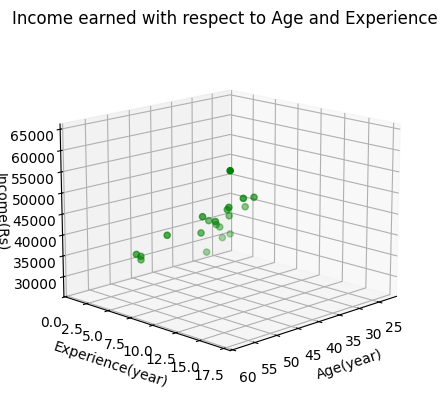

In [14]:
fig = plt.figure()
ax = plt.axes(projection='3d')

x = df["age"]
y = df["experience"]
z = df["income"]

# Scatter plot
ax.scatter(x, y, z, color='green')

# Adding titles and labels
ax.set_title('Income earned with respect to Age and Experience')
ax.set_xlabel('Age(year)')
ax.set_ylabel('Experience(year)')
ax.set_zlabel('Income(Rs)')

# Set a custom view (elevation and azimuthal angle)
ax.view_init(elev=15, azim=45)

# Display the plot
plt.show()

### Linear regression training phase

* We will be using library called scikit-learn

        ! pip install scikit-learn

In [16]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Define data and target
data = df[["age", "experience"]].values
target = df["income"].values

# Create Linear Regression model
lr_model = LinearRegression()

# Fit the model
print("Training the model")
lr_model.fit(data, target)

# Make predictions on the entire dataset
y_pred = lr_model.predict(data)
print("Predicted values:", y_pred)


Training the model
Predicted values: [30944.2101595  34773.04176604 30924.31653128 38899.45943897
 48620.33148852 41339.55606906 39296.24086081 36637.85989158
 38403.48266166 44692.30452651 30547.42873765 46061.14587475
 36717.16161882 34852.34349328 52845.9445169  40169.10543174
 62269.23050007 31142.60087042 46358.73194113 49215.50362128]


In [17]:
df[["age", "experience"]].shape

(20, 2)

* Checking the accuracy of the model

In [18]:
from sklearn.metrics import r2_score
r2 = r2_score(target, y_pred)
print(f"R-squared: {r2:.2f}")

R-squared: 0.98


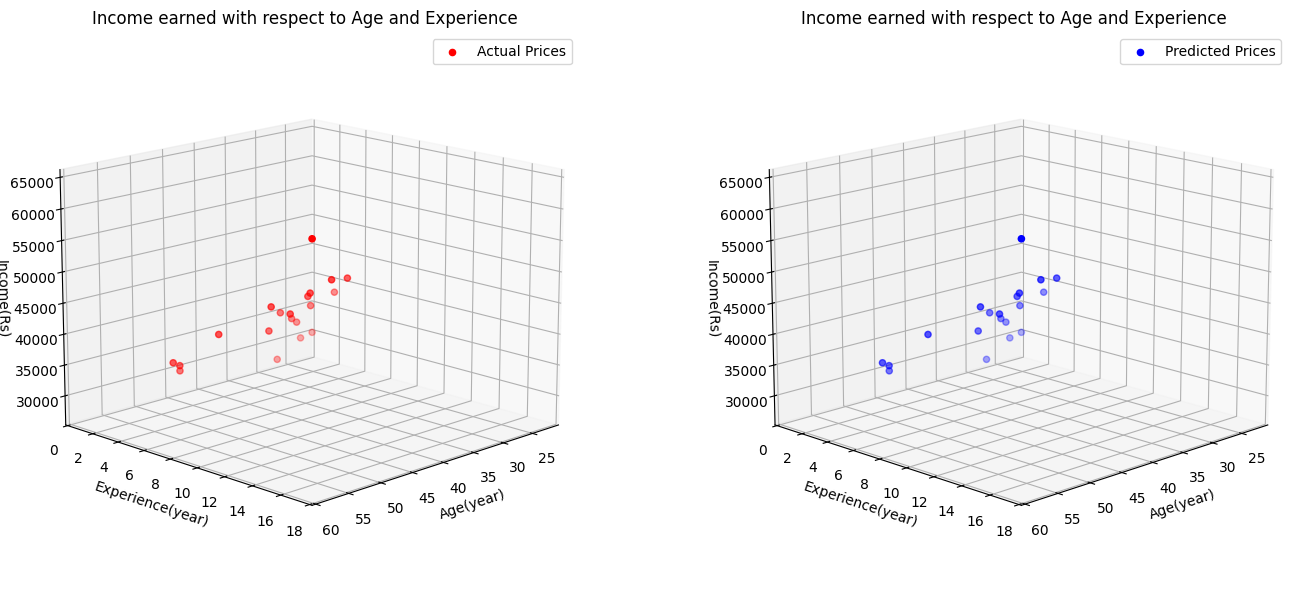

In [22]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(15, 6))

# 3D Scatter Plot for Actual Data
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(df["age"], df["experience"], df["income"], color="red", label="Actual Prices")
ax1.set_title('Income earned with respect to Age and Experience')
ax1.set_xlabel('Age(year)')
ax1.set_ylabel('Experience(year)')
ax1.set_zlabel('Income(Rs)')
ax1.view_init(elev=15, azim=45)
ax1.legend()

# 3D Scatter Plot for Predicted Data
ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(df["age"], df["experience"], df["income"], color="blue", label="Predicted Prices")
ax2.set_title('Income earned with respect to Age and Experience')
ax2.set_xlabel('Age(year)')
ax2.set_ylabel('Experience(year)')
ax2.set_zlabel('Income(Rs)')
ax2.view_init(elev=15, azim=45)
ax2.legend()

plt.tight_layout()
plt.show()